In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

In [2]:
import qutip
import numpy as np
import naq

# 04: Bringing it together

## Schrödinger equation

The Schrödinger equation gives the evolution of a state $ \psi $ as a
function of time, $ t $.

$$
  \frac{d}{dt} \psi = - \frac{i}{\hbar} H \psi
$$

We also need an initial state to start the evolution from, usually called
$ \psi_0 $ or $ \rho_0 $.

QuTiP provides a handy function, `sesolve`, for solving this for a given
Hamiltonian, $ H $.

In general, the Hamiltonan may also be a function of time, $ t $, so that
the Schrödinger equation becomes:

$$
  \frac{d}{dt} \psi = - \frac{i}{\hbar} H(t) \psi
$$

Let's try out `sesolve`:

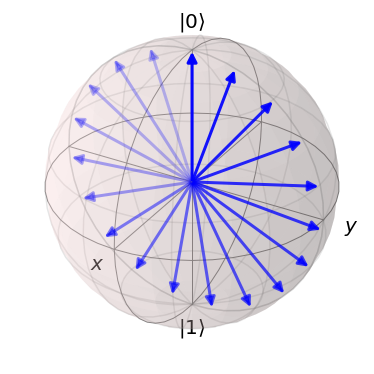

In [3]:
SX = qutip.sigmax()  # rotate around the X axis in time
g = np.pi / 10  # rotate 1/10 of pi per unit time
H = g * SX

psi0 = qutip.basis(2, 0)  # start in the first basis state
tlist = np.linspace(0, 10, 20)
result = qutip.sesolve(H, psi0, tlist=tlist)

bloch = qutip.Bloch()
bloch.vector_color = ["b"] * len(result.states)
for i, s in enumerate(result.states):
    bloch.add_states([s], alpha=0.2 + 0.8 * (i / len(result.states)))
bloch.show()


The `sesolve` function takes a few other options:

- `e_ops`: a list of measurement operators for storing expected outcomes
  of measurements of the state instead of (or in addition to) the
  states themselves.

- `options`: an instance of `qutip.Options` that allows one to change the
  behaviour of the underlying ODE integrator. An important option is
  `nsteps` which specifies the maximum number of *internal* steps the
  integrator should take between times in `tlist`.

For example, if one has a rapidly evolving system, one might need to
drastically increase `nsteps`, e.g.:

```
options = qutip.Options(nsteps=200_000)
result = qutip.sesolve(H, psi, tlist=tlist, options=options)
```

## Density matrices

So far we have dealt with "pure" quantum states, i.e., descriptions of
quantum systems that are in a specific quantum state.

Density matrices capture the concept of an ensemble of states, i.e., a
situation where we have only probabilistic knowledge of which "pure" state
the system is in.

Note that this is *different* from a superposition of states.

Pure states may already be superpositions. Superpositions are combinations of
pure states that combine to give another pure state. The coefficients are
*amplitudes* -- i.e. complex numbers. The squares of the lengths of the
amplitudes must sum to 1.

Ensemble states are also combintations of pure states, but the coefficients
are *probabilities* -- i.e. real numbers. The probabilities (*not* their
squares!) must sum to 1.

Density matrices are ubiquitious in quantum mechanics because when on asks
oneself what the state of a sub-system of a bigger system is, the answer
is in general only probabilistic -- i.e. an ensemble of the states of the
smaller system.

A density matrix is represented as an *opertor* -- i.e. a function that maps
states to other states. All density matrices may be written in the form:

$$
  \rho = \sum_{j} p_j \left\vert \psi_j \right\rangle \left\langle \psi_j \right\vert
$$

For a pure state, $ \psi $, the corresponding density matrix has the simple
form:

$$
  \rho_{\mathrm{pure}} = \left\vert \psi \right\rangle \left\langle \psi \right\vert
$$

For a pure state there is only one state in the ensemble, $ \psi $ and its
probability, $p_{\psi}$, is $ 1 $.

In QuTiP we can write this as:

In [4]:
psi = qutip.basis(2, 0)
rho = psi * psi.dag()
print(rho)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


or use the built-in function, `ket2dm`:

In [5]:
psi = qutip.basis(2, 0)
rho = qutip.ket2dm(psi)
print(rho)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


## Rydberg Blockade

A reminder of the Rydberg blockage mechanism:

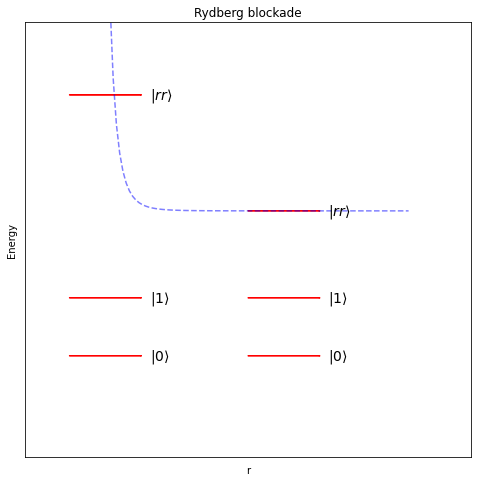

In [6]:
ax = naq.ax(
    1, 1,
    xlim=(-0.25, 2.25),
    ylim=(-0.25, 1.25),
    xticks=[], yticks=[],
    title="Rydberg blockade",
    ylabel="Energy",
    xlabel="r",
)

def rydberg_energy(r, C, E):
    return E + C / (r**6)

def plot_rydberg_energy(r, C, E, ax=None):
    energy = rydberg_energy(r, C, E)
    ax.plot(r, energy, color="b", linestyle="--", alpha=0.5)

naq.plot_energy_levels(ax, [
    ("|rr>", 1.0),
    ("|1>", 0.3),
    ("|0>", 0.1),
], xmid=0.2)

naq.plot_energy_levels(ax, [
    ("|rr>", 0.6),
    ("|1>", 0.3),
    ("|0>", 0.1),
], xmid=1.2)

r = np.linspace(0.1, 1.9, 100)
plot_rydberg_energy(r, 1e-4, 0.6, ax=ax)